In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import math
import numpy as np

In [138]:
buyersData = pd.read_csv('C:\\Users\\bfire\\OneDrive\\Desktop\\CSUSpring2025\\Data Mining\\VTargetBuyers.csv')
print("Dataset loaded")

Dataset loaded
int64


In [58]:
def calcNumAttributes(buyersData, columnIndex):
    columnData = buyersData.iloc[:, columnIndex]
    minVal = columnData.min()
    maxVal = columnData.max()
    meanVal = columnData.mean()
    varianceVal = columnData.var()
    stdDevVal = columnData.std()
    print("Collumn Index: " +str(columnIndex)+" Minimum Value: "+str(minVal)+" Maximum Value: "+ str(maxVal)+ " Average Value: "+str(meanVal)+" Variance: "+str(varianceVal)+ " Standared Deviation: "+str(stdDevVal)) 


In [60]:
print("Calculating Numerical Attributes\n")
calcNumAttributes(buyersData,5)
calcNumAttributes(buyersData,6)
calcNumAttributes(buyersData,7)
calcNumAttributes(buyersData,8)
calcNumAttributes(buyersData,9)
calcNumAttributes(buyersData,14)

Calculating Numerical Attributes

Collumn Index: 5 Minimum Value: 10000 Maximum Value: 170000 Average Value: 57305.77797013633 Variance: 1042375574.4691552 Standared Deviation: 32285.841702968737
Collumn Index: 6 Minimum Value: 0 Maximum Value: 5 Average Value: 1.8443518718892016 Variance: 2.5998593483429993 Standared Deviation: 1.6124079348424825
Collumn Index: 7 Minimum Value: 0 Maximum Value: 5 Average Value: 1.0040575632979873 Variance: 2.318492435360055 Standared Deviation: 1.5226596584135454
Collumn Index: 8 Minimum Value: 0 Maximum Value: 1 Average Value: 0.6763687513525211 Variance: 0.21890590654058462 Standared Deviation: 0.46787381476268214
Collumn Index: 9 Minimum Value: 0 Maximum Value: 4 Average Value: 1.5027050421986583 Variance: 1.2959403099006872 Standared Deviation: 1.1383937411549165
Collumn Index: 14 Minimum Value: 34 Maximum Value: 105 Average Value: 53.135793118372646 Variance: 126.81778711642396 Standared Deviation: 11.261340378321933


In [62]:
def calcDistinct(buyersData, columnIndex):
    columnData = buyersData.iloc[:, columnIndex]
    numOfDistinct = columnData.nunique()
    print(numOfDistinct)

In [64]:
print("Calculating Numerical Occurences\n")
calcDistinct(buyersData,5)
calcDistinct(buyersData,6)
calcDistinct(buyersData,7)
calcDistinct(buyersData,8)
calcDistinct(buyersData,9)
calcDistinct(buyersData,14)


Calculating Numerical Occurences

16
6
6
2
5
71


In [66]:
def showBoxPlot(buyersData, columnIndex):
    columnData = buyersData.iloc[:, columnIndex]
    plt.figure(figsize=(8, 5))
    plt.boxplot(columnData, vert=False, patch_artist=True)
    plt.title(f"Box Plot for Column {columnIndex + 1}")
    plt.xlabel("Values")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

def showHistogram(buyersData, columnIndex):
    columnData = buyersData.iloc[:, columnIndex]
    plt.figure(figsize=(8, 5))
    plt.hist(columnData, bins=20)
    plt.title(f"Histogram for Column {columnIndex + 1}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--")
    plt.show()
    
def showZVisual(buyersData, columnIndex):
    columnData = buyersData.iloc[:, columnIndex]
    z_scores = zscore(columnData)


    plt.figure(figsize=(8, 5))
    plt.plot(z_scores, marker='o', linestyle='', markersize=5, color='skyblue')
    plt.axhline(3, color='red', linestyle='--', label="Upper Threshold (+3 SD)")
    plt.axhline(-3, color='red', linestyle='--', label="Lower Threshold (-3 SD)")
    plt.title(f"Z-Score Visualization for Column {columnIndex + 1}")
    plt.xlabel("Data Point Index")
    plt.ylabel("Z-Score")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

Showing Box Plots, Histograms, and Z-Score Visuals


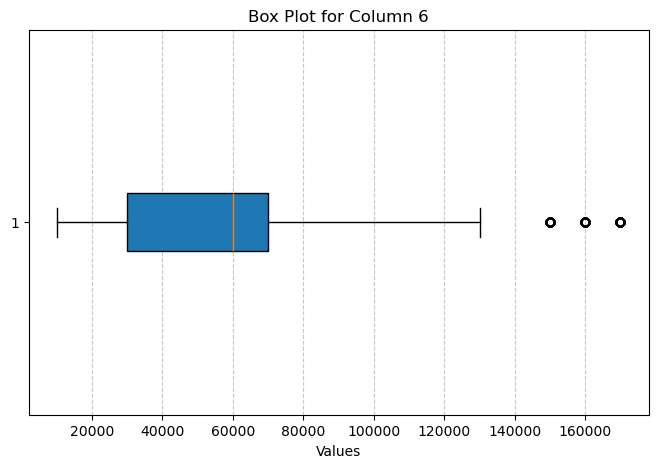

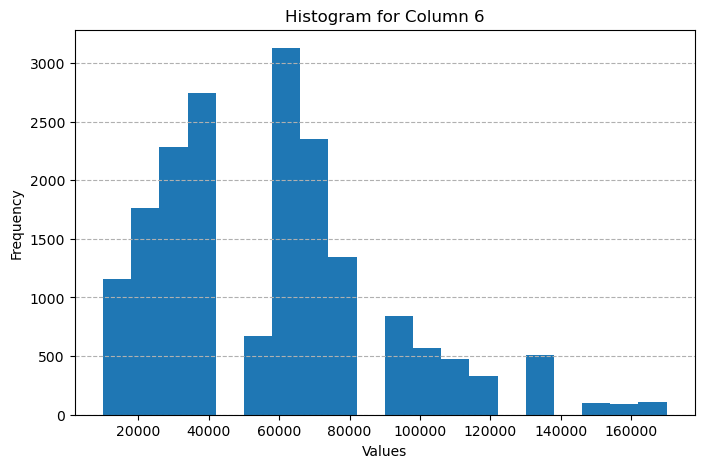

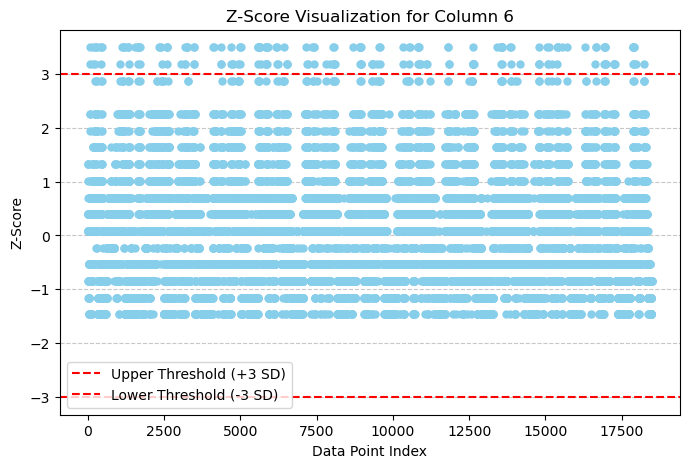

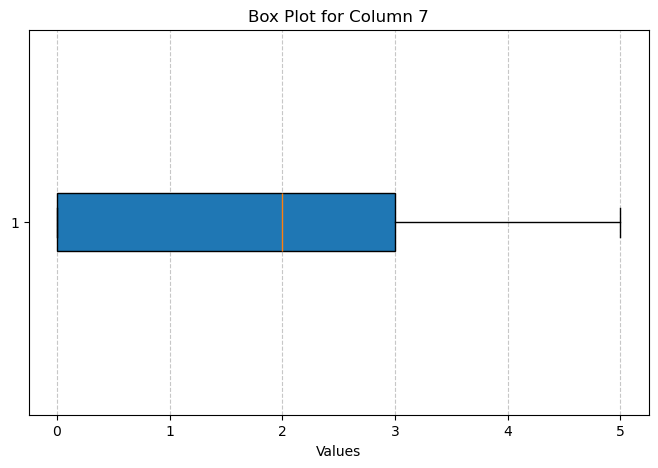

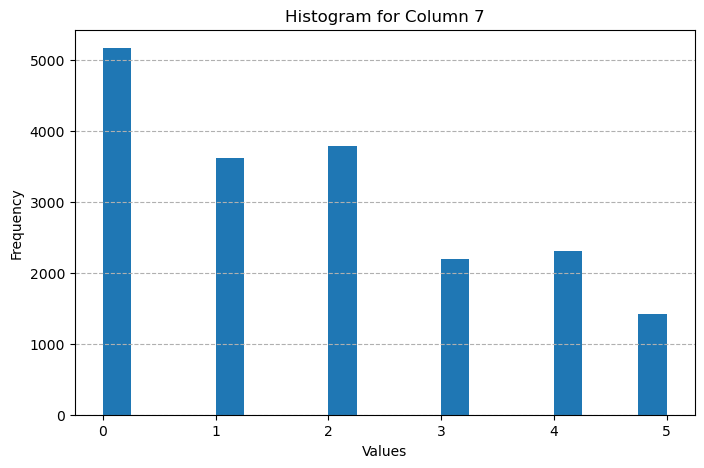

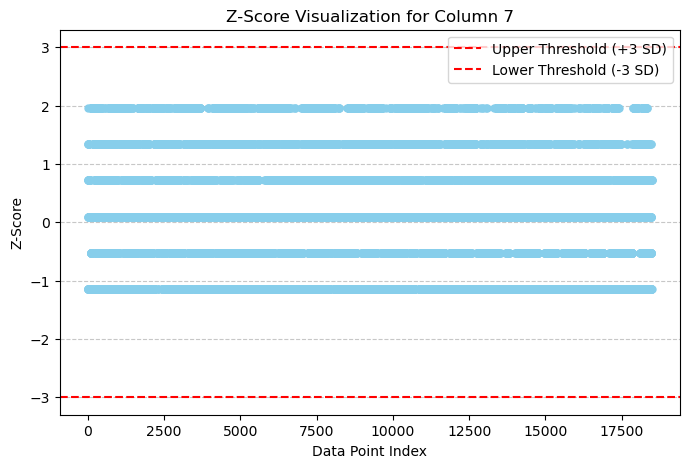

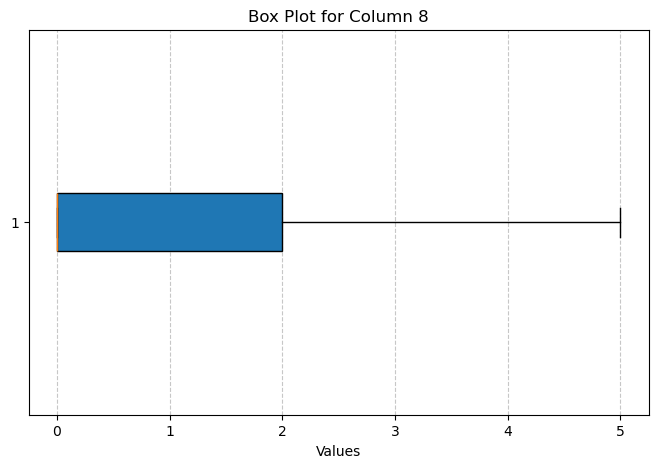

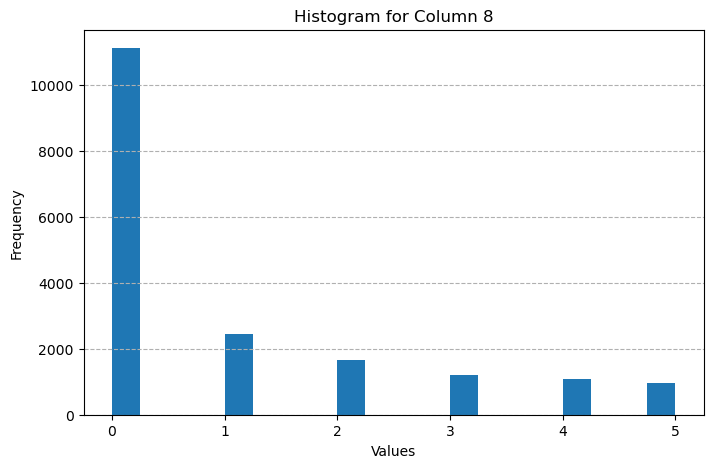

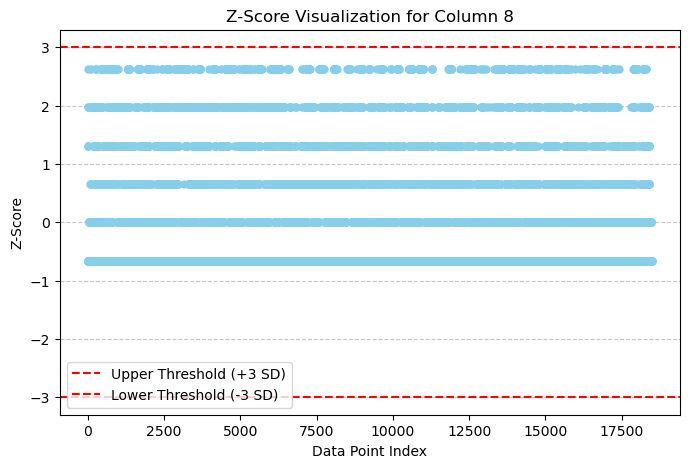

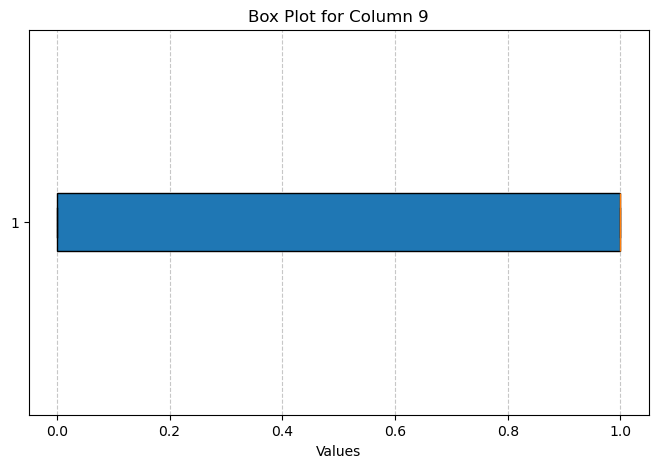

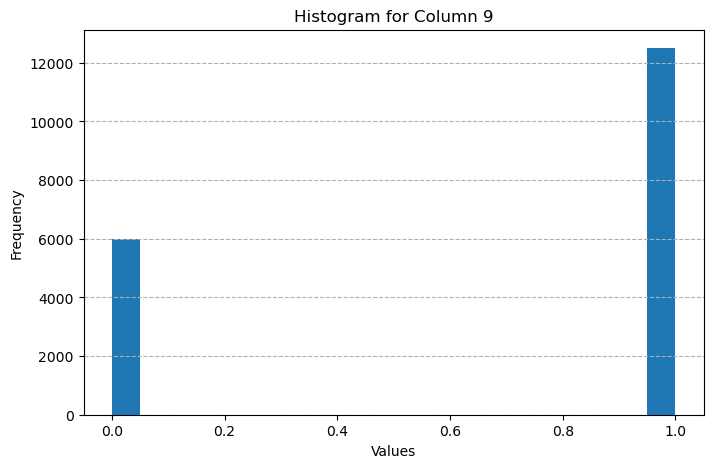

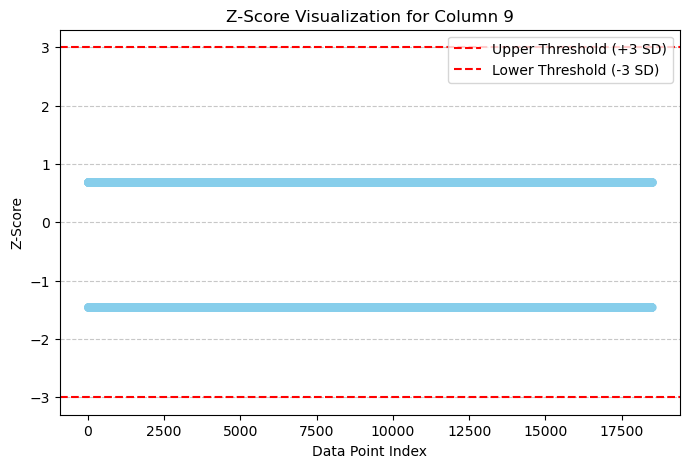

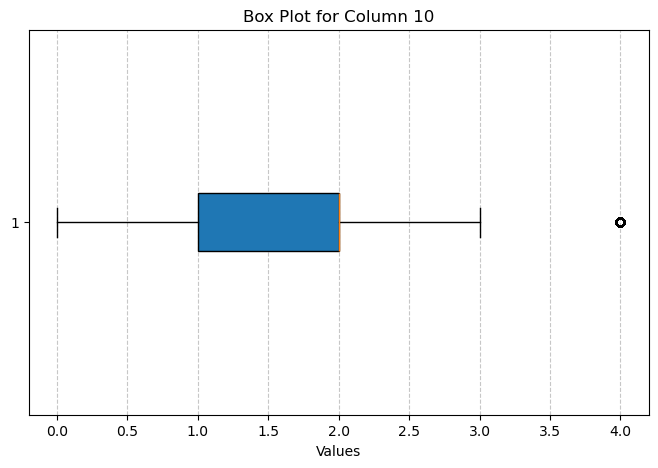

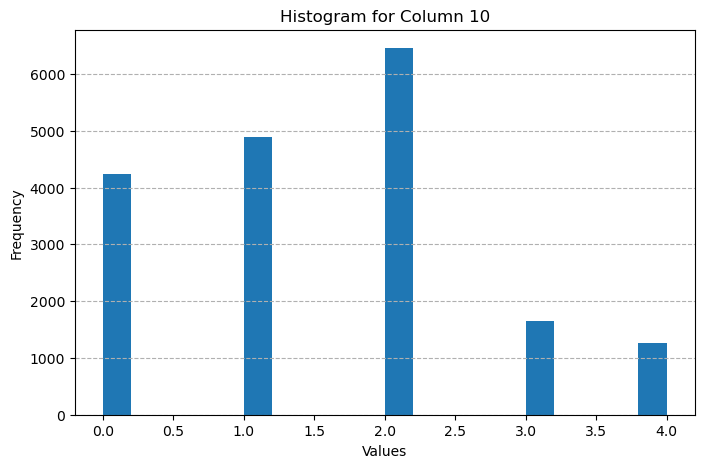

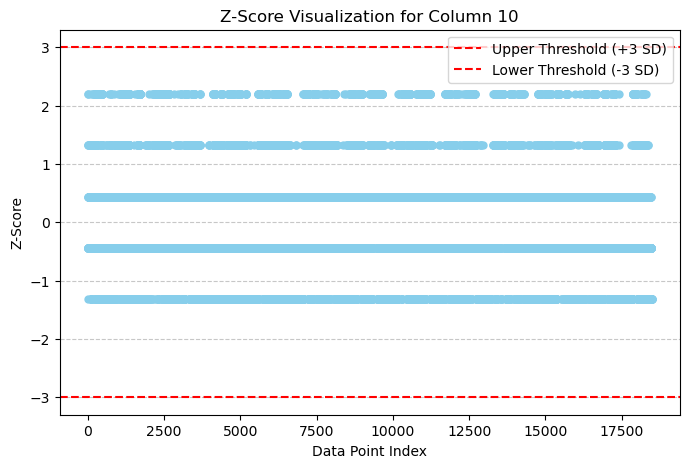

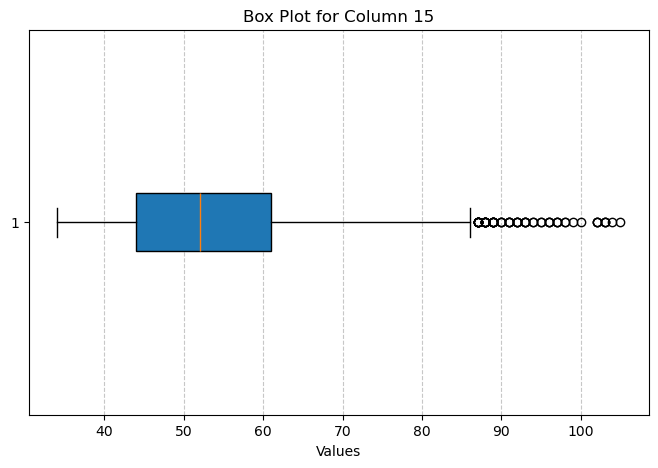

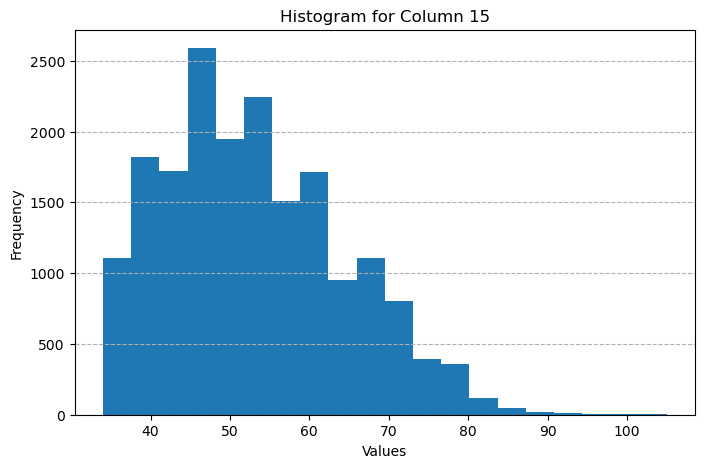

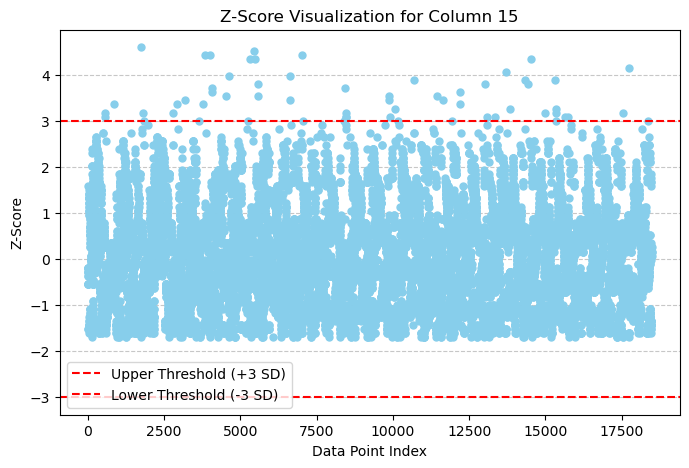

In [68]:

print("Showing Box Plots, Histograms, and Z-Score Visuals")
showBoxPlot(buyersData,5)
showHistogram(buyersData,5)
showZVisual(buyersData,5)
showBoxPlot(buyersData,6)
showHistogram(buyersData,6)
showZVisual(buyersData,6)
showBoxPlot(buyersData,7)
showHistogram(buyersData,7)
showZVisual(buyersData,7)
showBoxPlot(buyersData,8)
showHistogram(buyersData,8)
showZVisual(buyersData,8)
showBoxPlot(buyersData,9)
showHistogram(buyersData,9)
showZVisual(buyersData,9)
showBoxPlot(buyersData,14)
showHistogram(buyersData,14)
showZVisual(buyersData,14)


In [69]:
def IQRMethod(buyersData, columnIndex):
    columnData = buyersData.iloc[:, columnIndex]
    q1=columnData.quantile(0.25)
    q3=columnData.quantile(0.75)
    iqr = q3-q1
    lowerBound = q1-1.5*iqr
    upperBound = q3+1.5*iqr
    outliers = columnData[(columnData < lowerBound) | (columnData > upperBound)]
    print(f"Outliers: {outliers.values}")
    median= columnData.median()
    replacedData = columnData.apply(lambda x: median if x < lowerBound or x > upperBound else x)
    print(f"Replaced Data: {replacedData}")
    

In [70]:
IQRMethod(buyersData, 5)
IQRMethod(buyersData, 14)

Outliers: [160000 170000 160000 170000 160000 150000 170000 170000 150000 170000
 150000 150000 170000 170000 160000 150000 170000 150000 160000 170000
 150000 170000 150000 150000 170000 170000 150000 150000 170000 170000
 170000 150000 160000 170000 170000 170000 170000 150000 160000 170000
 150000 160000 170000 150000 150000 170000 170000 150000 170000 160000
 150000 150000 150000 160000 170000 170000 170000 150000 160000 170000
 160000 160000 170000 170000 170000 150000 150000 160000 170000 160000
 170000 170000 170000 160000 170000 160000 150000 160000 150000 170000
 160000 160000 150000 150000 150000 160000 150000 150000 160000 170000
 170000 170000 170000 170000 170000 150000 160000 170000 170000 150000
 150000 150000 170000 170000 160000 150000 160000 170000 160000 160000
 170000 160000 170000 170000 160000 170000 170000 170000 170000 160000
 150000 160000 150000 150000 150000 150000 150000 170000 160000 160000
 160000 170000 150000 160000 150000 150000 160000 170000 150000 150

In [74]:
def Discretization(buyersData, columnIndex):
    columnData = buyersData.iloc[:, columnIndex]
    binLabels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']
    binnedData = pd.cut(columnData, bins=5, labels=binLabels)

    buyersData['BinnedColumn'] = binnedData

    print("Binned Data (Equal-Width Bins):")
    print(buyersData[['BinnedColumn']].head())

    plt.figure(figsize=(8, 5))
    plt.hist(columnData, bins=5)
    plt.title(f"Histogram of Column {columnIndex + 1} with 5 Equal Bins")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    

Binned Data (Equal-Width Bins):
  BinnedColumn
0        Bin 3
1        Bin 2
2        Bin 2
3        Bin 2
4        Bin 3


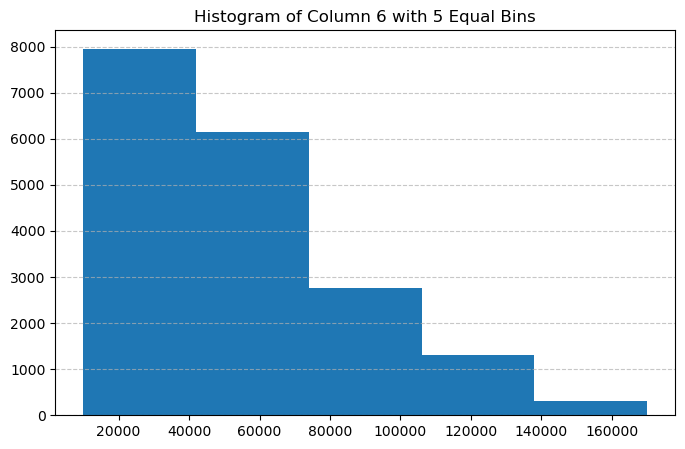

Binned Data (Equal-Width Bins):
  BinnedColumn
0        Bin 2
1        Bin 2
2        Bin 2
3        Bin 1
4        Bin 1


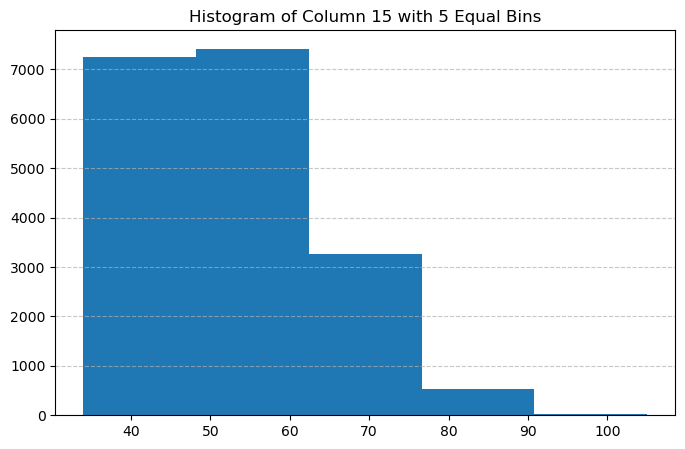

In [76]:
Discretization(buyersData, 5)
Discretization(buyersData, 14)

In [78]:
print("Hot2Encoder")
OneHotEncodingIndices = [10,11,13]  
columns2Encode = [buyersData.columns[i] for i in OneHotEncodingIndices]
print(f"Columns to Encode: {columns2Encode}")
encodedData = pd.get_dummies(buyersData, columns=columns2Encode, drop_first=False)
print("\nOne-Hot Encoded Data (First 5 Rows):")
print(encodedData.head())

encodedData.to_csv('transformed_dataset.csv', index=False)

Hot2Encoder
Columns to Encode: ['EnglishEducation', 'EnglishOccupation', 'CommuteDistance']

One-Hot Encoded Data (First 5 Rows):
   CustomerKey  GeographyKey CustomerAlternateKey MaritalStatus Gender  \
0        11000            26           AW00011000             M      M   
1        11001            37           AW00011001             S      M   
2        11002            31           AW00011002             M      M   
3        11003            11           AW00011003             S      F   
4        11004            19           AW00011004             S      F   

   YearlyIncome  TotalChildren  NumberChildrenAtHome  HouseOwnerFlag  \
0         90000              2                     0               1   
1         60000              3                     3               0   
2         60000              3                     3               1   
3         70000              0                     0               0   
4         80000              5                     5             

In [80]:
numericDataCols = buyersData.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
buyersData[numericDataCols] = scaler.fit_transform(buyersData[numericDataCols])
buyersData.to_csv('standardized_dataset.csv')
print("\nStandardized Dataset (First 5 Rows):")
print(buyersData.head())



Standardized Dataset (First 5 Rows):
   CustomerKey  GeographyKey CustomerAlternateKey MaritalStatus Gender  \
0    -1.731957     -1.180284           AW00011000             M      M   
1    -1.731770     -1.124312           AW00011001             S      M   
2    -1.731582     -1.154843           AW00011002             M      M   
3    -1.731395     -1.256610           AW00011003             S      F   
4    -1.731207     -1.215903           AW00011004             S      F   

   YearlyIncome  TotalChildren  NumberChildrenAtHome  HouseOwnerFlag  \
0      1.012676       0.096534             -0.659428        0.691725   
1      0.083451       0.716741              1.310862       -1.445661   
2      0.083451       0.716741              1.310862        0.691725   
3      0.393193      -1.143880             -0.659428       -1.445661   
4      0.702935       1.957156              2.624389        0.691725   

   NumberCarsOwned EnglishEducation EnglishOccupation DateFirstPurchase  \
0        

In [82]:
bd=buyersData
minVal, maxVal = [0,1]
collumns = bd.select_dtypes(include=['float64', 'int64']).columns
normalized = bd.copy()
for col in collumns:
    collumnMin = bd[col].min()
    collumnMax = bd[col].max()
    normalized[col] = (bd[col] - collumnMin) / (collumnMax - collumnMin) * (collumnMax - minVal) + minVal
normalized.to_csv('normalized_dataset.csv', index=False)
print("\nNormalized Dataset (First 5 Rows):")
print(normalized.head())


Normalized Dataset (First 5 Rows):
   CustomerKey  GeographyKey CustomerAlternateKey MaritalStatus Gender  \
0     0.000000      0.074180           AW00011000             M      M   
1     0.000094      0.108179           AW00011001             S      M   
2     0.000187      0.089634           AW00011002             M      M   
3     0.000281      0.027818           AW00011003             S      F   
4     0.000375      0.052544           AW00011004             S      F   

   YearlyIncome  TotalChildren  NumberChildrenAtHome  HouseOwnerFlag  \
0      1.745305       0.782862              0.000000        0.691725   
1      1.090816       1.174293              1.574633        0.000000   
2      1.090816       1.174293              1.574633        0.691725   
3      1.308979       0.000000              0.000000        0.000000   
4      1.527142       1.957156              2.624389        0.691725   

   NumberCarsOwned EnglishEducation EnglishOccupation DateFirstPurchase  \
0          

In [203]:
def NormalizeNumerical(df, column):
    minVal = df[column].min()
    maxVal = df[column].max()
    if minVal == maxVal:
        df[column] = 0  # Avoid division by zero
    else:
        df[column] = (df[column] - minVal) / (maxVal - minVal)





def oneHotEncode(data, columns):
    df = data.copy()  #Don't modify the original dataframe
    col_names = [df.columns[i] for i in columns]
    for col in columns:
        if col in df.columns:
            uniqueVals = df[col].dropna().unique()
            for val in unique_vals:
                df[f"{col}_{val}"] = (df[col] == val).astype(int)  # Create binary column
            df.drop(columns=[col], inplace=True)  # Remove original column


    return df


def extractVectors(data, customer_keys):
    vectors = data[data["CustomerKey"].isin(customer_keys)].drop(columns=["CustomerKey"])
    return vectors.values  # Convert to NumPy array

def simpleMatchingCoefficient(vec1, vec2):
    matches = sum(1 for i in range(len(vec1)) if vec1[i] == vec2[i])
    return matches / len(vec1)

def jaccardSimilarity(vec1, vec2):
    try:
        vec1 = [float(x) for x in vec1 if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit()]
        vec2 = [float(x) for x in vec2 if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit()]

        numerator = sum(a * b for a, b in zip(vec1, vec2))
        denominator = sum(a**2 for a in vec1) + sum(b**2 for b in vec2) - numerator

        return numerator / denominator
    except ValueError as e:
        print(f"Error in Jaccard Calculation: {e}")
        return None  #

def cosineSimilarity(vec1, vec2):
    try:
        vec1 = [float(x) for x in vec1 if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit()]
        vec2 = [float(x) for x in vec2 if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit()]

        numerator = sum(a * b for a, b in zip(vec1, vec2)) 
        denominator = math.sqrt(sum(a**2 for a in vec1)) * math.sqrt(sum(b**2 for b in vec2)) 

        return numerator / denominator
    except ValueError as e:
        print(f"Error in Cosine Calculation: {e}")
        return None  # Return None if conversion fails 


In [205]:
numericalCol = ["Age", "YearlyIncome","TotalChildren","HouseOwnerFlag","NumberChildrenAtHome","NumberCarsOwned"]  
for col in numericalCol:
    normalizeNumerical(buyersData, col)

OneHotEncodingIndices = [10, 11, 13]  
encodedData = oneHotEncode(buyersData, OneHotEncodingIndices)

buyersData["CustomerKey"] = buyersData["CustomerKey"].astype(int)
vectors = extractVectors(buyersData, [11000, 11001, 11012])
vec11000= vectors[0]
vec11001= vectors[1]
vec11012 = vectors[2]

    # Compute similarity between customer 11000 and 11001
smc_1 = simpleMatchingCoefficient(vec_11000, vec_11001)
jaccard_1 = jaccardSimilarity(vec_11000, vec_11001)
cosine_1 = cosineSimilarity(vec_11000, vec_11001)
    # compute similarity between customer 11000 and 11012
smc_2 = simpleMatchingCoefficient(vec_11000, vec_11012)
jaccard_2 = jaccardSimilarity(vec_11000, vec_11012)
cosine_2 = cosineSimilarity(vec_11000, vec_11012)
print(f"Similarity between 11000 & 11001 - SMC: {smc_1}, Jaccard: {jaccard_1}, Cosine: {cosine_1}")
print(f"Similarity between 11000 & 11012 - SMC: {smc_2}, Jaccard: {jaccard_2}, Cosine: {cosine_2}")


Similarity between 11000 & 11001 - SMC: 0.5517241379310345, Jaccard: 0.8871966579616977, Cosine: 0.9989832757119962
Similarity between 11000 & 11012 - SMC: 0.6206896551724138, Jaccard: 0.04436434125907781, Cosine: 0.9982800095803153


In [191]:
def simpleMatchingCoefficient(vec1, vec2):
    matches = sum(1 for i in range(len(vec1)) if vec1[i] == vec2[i])
    return matches / len(vec1)


first_100_customers = buyersData.iloc[:100, 1:].values  # Exclude CustomerKey

numOfCustomers = len(first_100_customers)
smcMatrix = np.zeros((numOfCustomers, numOfCustomers))

for i in range(numOfCustomers):
    for j in range(i, numOfCustomers):  # Avoid redundant calculations
        smc = simple_matching_coefficient(first_100_customers[i], first_100_customers[j])
        smcMatrix[i, j] = smcMatrix[j, i] = smc  # Ensure symmetry

# Convert matrix to DataFrame for better readability
simMatrix = pd.DataFrame(smcMatrix, columns=range(100), index=range(100))

# Save to CSV
simMatrix.to_csv("smc_similarity_matrix.csv", index=False)

print("Simple Matching Similarity matrix saved as smc_similarity_matrix.csv.")

Simple Matching Similarity matrix saved as smc_similarity_matrix.csv.
